In [41]:
import ast
import itertools
from itertools import permutations
from sys import maxsize

import numpy as np
from pyproj import Proj
from shapely.geometry import (GeometryCollection, LineString, MultiLineString,
                              MultiPoint, MultiPolygon, Point)

In [13]:
points = [
    {
        "latitude": 37.1726668,
        "longitude": -3.5996359,
        "number":1
    },
    {
        "latitude": 37.178399,
        "longitude": -3.599734,
        "number":2
    },
    {
        "latitude": 37.170009,
        "longitude": -3.599067,
        "number":3
    },
    {
        "latitude": 37.173849,
        "longitude": -3.60304,
        "number":4
    },
    {
        "latitude": 37.1743,
        "longitude": -3.602934,
        "number":5
    },
    {
        "latitude": 37.174385,
        "longitude": -3.603439,
        "number":6
    },
    {
        "latitude": 37.174771,
        "longitude": -3.606839,
        "number":7
    },
    {
        "latitude": 37.177224,
        "longitude": -3.603417,
        "number":8
    }
]

avoid_points = [
    {
        "latitude": 37.175918,
        "longitude": -3.605083,
        "number":10
    },
    {
        "latitude": 37.175180,
        "longitude": -3.598421,
        "number":11
    },
    {
        "latitude": 37.180668,
        "longitude": -3.599708,
        "number":12
    }
]



In [14]:
points[0]['latitude']

37.1726668

In [299]:
p = Proj(proj='utm',zone=28,ellps='GRS80', preserve_units=False )

In [277]:
p = Proj(proj='lcc', lat_1=40 ,lat_0=40 ,lon_0=0 ,k_0=0.9988085293 ,x_0=600000 ,y_0=600000 ,a=6378298.3 ,rf=294.73 ,pm=-3.687375 ,units='m' ,type='crs')

In [ ]:
p = Proj(proj='utm',zone=28,ellps='WGS84', preserve_units=False)

In [320]:
# a more specific projection for Spain or Europe let our points isolated, this projection works ok for this points
p = Proj(proj='utm',zone=10,ellps='WGS84', units='m', )

In [321]:


points_good = [p(point['longitude'], point['latitude']) for point in points]
points_good = [Point(point) for point in points_good]
points_bad = [p(point['longitude'], point['latitude']) for point in avoid_points]
points_bad = [Point(point).buffer(200) for point in points_bad]
points_good

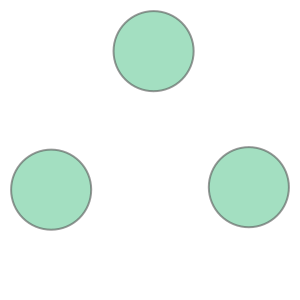

In [322]:
MultiPolygon(points_bad)

In [323]:
points_bad[0].area

125461.93962163804

In [324]:
points_bad[0].distance(points_good[0])

637.9873668855083

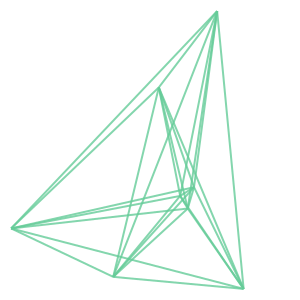

In [325]:
multilines = []
for point1, point2 in itertools.combinations(points_good, 2):
    multilines.append(LineString([point1, point2]))
point_lines = MultiLineString(multilines)
point_lines

In [326]:
len(points)

8

In [327]:
points_good

In [328]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

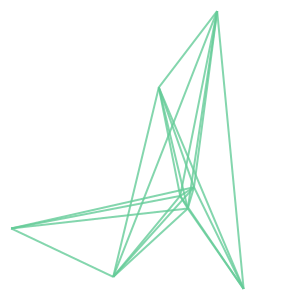

In [329]:
distance_matrix = np.zeros((len(points), len(points)))
multilines_good = []
for ix1, ix2 in itertools.combinations(np.arange(8), 2):
    point1 = points_good[ix1]
    point2 = points_good[ix2]
    line = LineString([point1, point2])
    emptiness = []
    for point_bad in points_bad:
        emptiness.append(point_bad.intersection(line).is_empty)
    if all(emptiness):
        multilines_good.append(line)
        distance_matrix[ix1, ix2] = line.length
        distance_matrix[ix2, ix1] = line.length
    else:
        distance_matrix[ix1, ix2] = 99999999999
        distance_matrix[ix2, ix1] = 99999999999

point_lines_good = MultiLineString(multilines_good)
point_lines_good

In [330]:
distance_matrix.round(2)

array([[0.00000e+00, 1.00000e+11, 4.15540e+02, 4.57610e+02, 4.78280e+02,
        5.38560e+02, 9.45600e+02, 8.42950e+02],
       [1.00000e+11, 0.00000e+00, 1.00000e+11, 8.11040e+02, 7.44760e+02,
        7.68970e+02, 1.00000e+11, 4.88890e+02],
       [4.15540e+02, 1.00000e+11, 0.00000e+00, 7.68270e+02, 8.15280e+02,
        8.63390e+02, 1.20713e+03, 1.23448e+03],
       [4.57610e+02, 8.11040e+02, 7.68270e+02, 0.00000e+00, 7.07200e+01,
        9.61400e+01, 4.89550e+02, 5.22160e+02],
       [4.78280e+02, 7.44760e+02, 8.15280e+02, 7.07200e+01, 0.00000e+00,
        6.36400e+01, 4.86990e+02, 4.54510e+02],
       [5.38560e+02, 7.68970e+02, 8.63390e+02, 9.61400e+01, 6.36400e+01,
        0.00000e+00, 4.23470e+02, 4.37500e+02],
       [9.45600e+02, 1.00000e+11, 1.20713e+03, 4.89550e+02, 4.86990e+02,
        4.23470e+02, 0.00000e+00, 1.00000e+11],
       [8.42950e+02, 4.88890e+02, 1.23448e+03, 5.22160e+02, 4.54510e+02,
        4.37500e+02, 1.00000e+11, 0.00000e+00]])

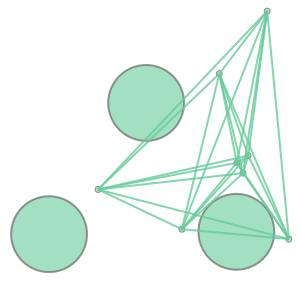

In [331]:
GeometryCollection([MultiPoint(points_good), MultiPolygon(points_bad), point_lines])

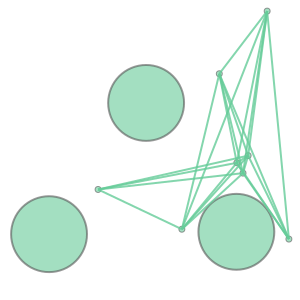

In [332]:
GeometryCollection([MultiPoint(points_good), MultiPolygon(points_bad), point_lines_good])

In [333]:
len(multilines)

28

In [334]:
len(multilines_good)

24

In [335]:
multilines_good[0].length

415.5409389017244

In [336]:
point_lines_good.geoms[0].length

415.5409389017244

# tsp

In [337]:
distance_matrix.shape[0]

8

In [338]:
len(points)

8

In [339]:
from sys import maxsize
from itertools import permutations
V = len(points)
 
# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
 
        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
 
        # update minimum
        if current_pathweight < min_path:
            path = str(i)
        min_path = min(min_path, current_pathweight)
         
    return min_path, path

 
# matrix representation of graph
graph = distance_matrix
s = 0
print(travellingSalesmanProblem(graph, s))

(4237.064473281892, '(2, 3, 6, 5, 4, 1, 7)')


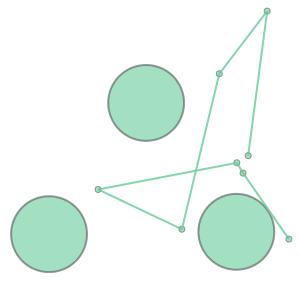

In [340]:
start = 3
min_dist, min_path = travellingSalesmanProblem(graph, start)
x = list(ast.literal_eval(min_path))
x.insert(0, start)
opt_path = []
for ix1, ix2 in itertools.pairwise(x):
    opt_path.append(LineString([points_good[ix1], points_good[ix2]]))
opt_path_lines = MultiLineString(opt_path)
GeometryCollection([MultiPoint(points_good), MultiPolygon(points_bad), opt_path_lines])

In [298]:
x

[3, 0, 2, 6, 7, 1, 5, 4]

# try with graphs

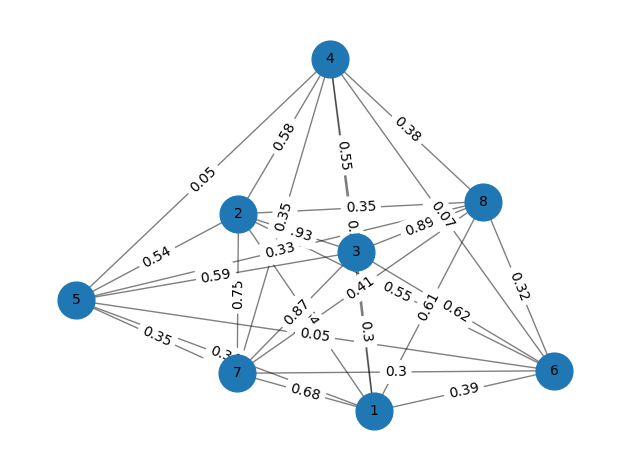

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for point in points:
    G.add_node(point['number'], size=0.2, position=(point['latitude'], point['longitude']))

# for point in avoid_points:
#     G.add_node(point['number'], size=0.2, position=(point['latitude'], point['longitude']))

for comb in itertools.combinations(points, 2):
    G.add_edge(comb[0]['number'], comb[1]['number'], weight=round(geopy.distance.distance(list(comb[0].values())[:2], list(comb[1].values())[:2]).km,2))


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
# nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
# )
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [14]:
from pyvis.network import Network
from IPython.display import display, HTML

def show_graph(nt):
  nt.show('example.html')
  display(HTML('example.html'))

nt = Network('700px', '700px', bgcolor="white", directed=True, notebook=True, cdn_resources="remote")
nt.from_nx(G)
show_graph(nt)